In [2]:
import numpy as np
import pandas as pd

In [5]:
column_names = ['year', *('average' + str(i) for i in range(12)), *('covariance' + str(i) for i in range(78))]
data = pd.read_csv("YearPredictionMSD.txt", sep = ",", header=None, names = column_names)

In [6]:
data.head()

,year,average0,average1,average2,average3,average4,average5,average6,average7,average8,...,covariance68,covariance69,covariance70,covariance71,covariance72,covariance73,covariance74,covariance75,covariance76,covariance77
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [8]:
train = data.iloc[:463715, :]
test = data.iloc[463715:, :]
len(train), len(test)

(463715, 51630)

In [7]:
Для решения задачи предлагается использовать метод наименьших квадратов с регуляризацией

In [32]:
def get_ans(dataset):
    return dataset.iloc[:, [0]]

def get_x(dataset):
    return dataset.iloc[:, 1:]

from sklearn.utils import shuffle
train, test = shuffle(train), shuffle(test)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn import cross_validation
from matplotlib import pyplot as plt

In [23]:
regularization_params = [i/10 for i in range(15)]
scores = []
for param in regularization_params:
    model = linear_model.Ridge(param)
    train_size, test_size = 20000, 5000
    model.fit(get_x(train[:train_size]), get_ans(train[:train_size]))
    md_ans = model.predict(get_x(test[:test_size]))
    scores.append(sqrt(mean_squared_error(get_ans(test[:test_size]), md_ans)))
best_score = 10000
best_param = -1
for ind, param in enumerate(regularization_params):
    if best_score > scores[ind]:
        best_score = scores[ind]
        best_param = param
assert(best_score < 10000)
scores

[91.44714723040313,
 91.44714738530332,
 91.4471475402068,
 91.44714769511359,
 91.44714785002348,
 91.44714800493679,
 91.44714815985333,
 91.44714831477303,
 91.44714846969607,
 91.44714862462236,
 91.44714877955192,
 91.44714893448469,
 91.44714908942073,
 91.44714924436006,
 91.4471493993026]

In [33]:
scaling_params = [i/10 for i in range(1,11)]
best_param = 0 #in order not to require previous cells to be run
model = linear_model.Ridge(best_param)

scores = []
for scale in scaling_params:
    train_size = int(len(train) * scale)
    test_size = int(len(test) * scale)
    model.fit(get_x(train[:train_size]), get_ans(train[:train_size]))
    md_ans = model.predict(get_x(test[:test_size]))
    scores.append(r2_score(get_ans(test[:test_size]), md_ans))
scores

[0.21055280965974632,
 0.23094712536602469,
 0.23591108708301778,
 0.23863616852739278,
 0.23649985107224847,
 0.2347417736549744,
 0.2339521853233253,
 0.23213138094415853,
 0.23059526427004318,
 0.23199621638960566]

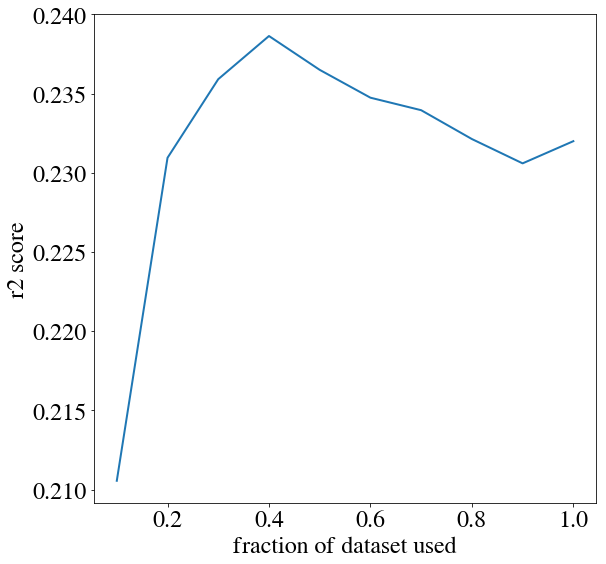

In [40]:
#from recommendations
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

plt.figure(figsize=(9, 9))
plt.plot(scaling_params, scores)
plt.xlabel('fraction of dataset used')
plt.ylabel('r2 score')
plt.show()